In [16]:
'''Data Source:
http://guides.lib.purdue.edu/c.php?g=353290&p=2378621#Mississippi
'''
import itertools
from osgeo import ogr
import shapely
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import math
import time
import pickle
import numpy as np
import sys
import time
import numpy        
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import os
from descartes import PolygonPatch
from  osgeo import ogr, osr
#%matplotlib inline  
# Import the necessary modules


epsgdic = {'nad83':4269,'wgs84':4326,'pseudoutm':3857}
home =r'/home/naresh-1/workspace/machinelrn/data/gis/'
srcshpfile = home + r'ODNR_CNTY/ODNR_COUNTY.shp'
outputShapefile = home+ r'ODNR_CNTY_gws/gws84.shp'

driver = ogr.GetDriverByName('ESRI Shapefile')
shp = driver.Open(srcshpfile)

# Get Projection from layer
layer = shp.GetLayer()
sourceSpatialRef = layer.GetSpatialRef()
outgcsref= osr.SpatialReference()
outgcsref2= osr.SpatialReference()
outprjref = osr.SpatialReference()

if sourceSpatialRef.IsProjected:
    datum=sourceSpatialRef.GetAttrValue('GEOGCS|DATUM')
    if 'North_American_Datum_1983' in datum:
        outgcsref.ImportFromEPSG(epsgdic['nad83']) #NAD83 --> WGS84/4326
        outgcsref2.ImportFromEPSG(epsgdic['wgs84']) #NAD83 --> WGS84/4326
        outprjref.ImportFromEPSG(epsgdic['pseudoutm']) #sthGcs -->Proj/3857

#saving layer
if os.path.exists(outputShapefile):
    driver.DeleteDataSource(outputShapefile)
outDataSet = driver.CreateDataSource(outputShapefile)

outLayer = outDataSet.CreateLayer("mystates", geom_type=ogr.wkbMultiPolygon)
# add fields
inLayerDefn = layer.GetLayerDefn()
for i in range(0, inLayerDefn.GetFieldCount()):
    fieldDefn = inLayerDefn.GetFieldDefn(i)
    outLayer.CreateField(fieldDefn)

outLayerDefn = outLayer.GetLayerDefn()
inFeature = layer.GetNextFeature()
cnt = 0
while inFeature:
    inputGeom = inFeature.GetGeometryRef()
    # get the cover attribute for the input feature
    inputGeom.TransformTo(outgcsref)  #to nad83
    inputGeom.TransformTo(outgcsref2) #to WGS84
    #inputGeom.TransformTo(outprjref) #to WGS84/Pseudo Mercator

    outFeature = ogr.Feature(outLayerDefn)
    outFeature.SetGeometry(inputGeom)
    for i in range(0, outLayerDefn.GetFieldCount()):
        outFeature.SetField(outLayerDefn.GetFieldDefn(i).GetNameRef(), inFeature.GetField(i))
    outLayer.CreateFeature(outFeature)
    inFeature = None
    inFeature = layer.GetNextFeature()
    cnt+=1
prjfile = open(os.path.splitext(outputShapefile)[0]+'.prj','w')
prjfile.write(outgcsref2.ExportToPrettyWkt())
prjfile.close()
shp = None
outDataSet = None
print("completed cordinate transform.")

completed cordinate transform.


LINEARRING


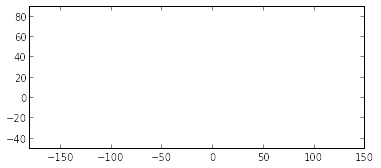

0


In [66]:

import matplotlib.path as mpath
import matplotlib.patches as mpatches
from osgeo import ogr
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import pickle
import sys
import os
from descartes import PolygonPatch
from  osgeo import ogr, osr

# Extract first layer of features from shapefile using OGR
#ds = ogr.Open('world.shp')
#lyr = ds.GetLayer(0)

# Prepare figure
plt.ioff()
plt.subplot(1,1,1)
ax = plt.gca()

paths = []
lyr.ResetReading()

lyr.SetAttributeFilter ( " NAME = 'ANGOLA' ")
ax.set_xlim(-180, 150)
ax.set_ylim(-50, 90)
# Read all features in layer and store as paths
cnt=0
for geom in union:
    print(geom.GetGeometryName())
    envelope = np.array( geom.GetEnvelope())
    # check if geom is polygon
    if geom.GetGeometryType() == ogr.wkbPolygon:
        codes = []
        all_x = []
        all_y = []
        if geom.GetGeometryCount() < 6:
            continue
        for i in range(geom.GetGeometryCount()):
            cnt+=1
            # Read ring geometry and create path
            r = geom.GetGeometryRef(i)
            x = [r.GetX(j) for j in range(r.GetPointCount())]
            y = [r.GetY(j) for j in range(r.GetPointCount())]
            # skip boundary between individual rings
            codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
            all_x += x
            all_y += y
        path = mpath.Path(np.column_stack((all_x,all_y)), codes)
        paths.append(path)
# Add paths as patches to axes
for path in paths:
    patch = mpatches.PathPatch(path, \
            facecolor='0.8', edgecolor='RED')
    ax.add_patch(patch)

ax.set_aspect(1)
plt.show()


In [14]:
#!/usr/bin/python
import os
from  osgeo import ogr, osr
import pickle
from affine_transformation import *

def GetOutfeature(outLayer, outLayerDefn,geom,inFeature): #copy infeature to outLayer, and sets geom into feature.
    outFeature = ogr.Feature(outLayerDefn)
    outFeature.SetGeometry(geom)
    for i in range(0, outLayerDefn.GetFieldCount()):
        outFeature.SetField(outLayerDefn.GetFieldDefn(i).GetNameRef(), inFeature.GetField(i))
    return outFeature

def createOutLayer(inlayer,outputShapefile, outlayername,outprojref,outgeomtype=ogr.wkbMultiPolygon):
    #create a data-set.
    outLayer=outLayerDefn=None
    if os.path.exists(outputShapefile):
        driver.DeleteDataSource(outputShapefile)
    outDataSet = driver.CreateDataSource(outputShapefile)
    
    # create output layer, copy fields from inlayer fielddefn
    outLayer = outDataSet.CreateLayer(outlayername,outprojref,geom_type=outgeomtype)
    
    inLayerDefn = inlayer.GetLayerDefn()
    
    for i in range(0, inLayerDefn.GetFieldCount()):
        fieldDefn = inLayerDefn.GetFieldDefn(i)
        outLayer.CreateField(fieldDefn)
    
    outLayerDefn = outLayer.GetLayerDefn()
    return outDataSet,outLayer, outLayerDefn

    
epsgdic = {'nad83':4269,'wgs84':4326,'pseudoutm':3857,'worldmercater':3395}
home =r'/home/naresh-1/workspace/machinelrn/data/gis/'
srcshpfile = home + r'out/prj_states.shp'
outputShapefile = home+ r'out/prj.trans.states.shp'
tv = pickle.load(open(home+r'out/translation_vector.p','rb'))

driver = ogr.GetDriverByName('ESRI Shapefile')
shp = driver.Open(srcshpfile)
inlayer = shp.GetLayer()
outDataSet,outLayer, outLayerDefn = createOutLayer(inlayer,outputShapefile,"testlayer",inlayer.GetSpatialRef(),outgeomtype=ogr.wkbMultiPolygon)

#read the features one by one.
inFeature = inlayer.GetNextFeature()
while inFeature:
    geom= inFeature.GetGeometryRef()
    geom=translate(geom, xoff=-tv['xoff'], yoff=-tv['yoff'], zoff=0.0) #xoff val is -ve.
    # get the cover attribute for the input feature
    outFeature = GetOutfeature(outLayer, outLayerDefn,geom,inFeature)
    outLayer.CreateFeature(outFeature)
    
    inFeature=outFeature=geom=None
    inFeature = inlayer.GetNextFeature()
print("extents inlayer/outlayer"),inlayer.GetExtent(), outLayer.GetExtent()
shp = None
outDataSet = None
print("completed cordinate transform.")

got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'


In [ ]:

    
#testing co-ordinate system transformation.
point = ogr.Geometry(ogr.wkbPoint)
poly = ogr.Geometry(ogr.wkbPolygon)
ring = ogr.Geometry(ogr.wkbLinearRing)
mpoly = ogr.Geometry(ogr.wkbMultiPolygon)

ring.AddPoint(2,1)
ring.AddPoint(2,2)
ring.AddPoint(0,2)
ring.AddPoint(2,1)
poly.AddGeometry(ring)
mpoly.AddGeometry(poly)
mpoly.AddGeometry(poly)
point.AddPoint(0,2)


inputref = osr.SpatialReference()
outprjrefwm = osr.SpatialReference()
inputref.ImportFromEPSG(4326)
outprjrefwm.ImportFromEPSG(3395)
point.AssignSpatialReference(inputref)
point.TransformTo(outprjrefwm)
print point

In [17]:
import pickle
xmin,ymin,xmax,ymax=-20037508.3428, -15496570.7397, 20037508.3428, 18764656.2314
tv = {'epsg':3395,'name':'world mercator', 'unit':'meter', 'xoff':xmin,'yoff':ymin,'xmax':xmax,'ymax':ymin}
pickle.dump(tv,open(home+r'out/translation_vector.p','wb'))
tv = pickle.load(open(home+r'out/translation_vector.p','rb'))

6152274.928091211

In [1]:
#Testing.
import affine_transformation as at
reload(at)
import pickle
from  osgeo import ogr, osr
home =r'/home/naresh-1/workspace/machinelrn/data/gis/'
tv = pickle.load(open(home+r'out/translation_vector.p','rb'))
xoff,yoff=tv['xoff'],tv['yoff']
point = ogr.Geometry(ogr.wkbPoint)
poly = ogr.Geometry(ogr.wkbPolygon)
ring = ogr.Geometry(ogr.wkbLinearRing)
mpoly = ogr.Geometry(ogr.wkbMultiPolygon)

ring.AddPoint(2,1)
ring.AddPoint(2,2)
ring.AddPoint(0,2)
ring.AddPoint(2,1)
poly.AddGeometry(ring)
mpoly.AddGeometry(poly)
mpoly.AddGeometry(poly)
point.AddPoint(13885233.414708788+1, 7452828.220063132+1)

print point.GetPoints(),point.IsEmpty(),point.GetCoordinateDimension()
print ring.GetPoints(),ring.IsEmpty(),ring.GetCoordinateDimension()
print poly.GetBoundary(),poly.IsEmpty(),poly.GetCoordinateDimension()
print("xoff,yofof"),xoff,yoff

pt1=at.translate(point,-xoff,-yoff,enlarge=10000000)
'''
pt2=translate(ring,xoff,yoff)
pt3=translate(poly,xoff,yoff)
pt4=translate(mpoly,xoff,yoff)
print
print("translated"),point, pt1
print("translated"),ring, pt2
print("translated"),poly, pt3
print("translated"),mpoly,pt4 '''

NameError: name 'ogr' is not defined

In [32]:
#Testing.
#Testing labeling the segments
import pickle
from  osgeo import ogr, osr,gdal
from osgeo import *
from shapely.geometry import LinearRing,Point,mapping
point = ogr.Geometry(ogr.wkbPoint)
mp = ogr.Geometry(ogr.wkbMultiPoint)
poly = ogr.Geometry(ogr.wkbPolygon)
ring = ogr.Geometry(ogr.wkbLinearRing)
mpoly = ogr.Geometry(ogr.wkbMultiPolygon)
ring2=[()]
ring.AddPoint(5,5)
ring.AddPoint(6,4)
ring.AddPoint(8,4)
ring.AddPoint(8,2)
ring.AddPoint(10,4)
ring.AddPoint(11,3)
ring.AddPoint(12,5)
ring.AddPoint(10,6)
ring.AddPoint(9,5)
ring.AddPoint(6,6)
#ring.AddPoint(5,5)
#
point.AddPoint(5,5)
poly.AddGeometry(ring)
mpoly.AddGeometry(poly)

print("point"),point.GetPoints(),point.IsEmpty(),point.GetCoordinateDimension()
print("ring"),ring.GetPoints(),ring.IsEmpty(),ring.GetCoordinateDimension()
print("poly"),poly.GetBoundary(),poly.IsEmpty(),poly.GetCoordinateDimension()
print("type"),point.GetGeometryName(),ring.IsValid(),ring.GetBoundary()
#Shapely objects
ring1=[(5.0, 5.0, 0.0),
 (6.0, 4.0, 0.0),
 (8.0, 4.0, 0.0),
 (8.0, 2.0, 0.0),
 (10.0, 4.0, 0.0),
 (11.0, 3.0, 0.0),
 (12.0, 5.0, 0.0),
 (10.0, 6.0, 0.0),
 (9.0, 5.0, 0.0),
 (6.0, 6.0, 0.0),
 (5.0, 5.0, 0.0)]

ring2=[(14,1),(17,2),(17,4),(15,4),(14,7),(14,8),(9,8),(9,5),(10,6),(12,5),(11,3),(13,3),(14,1)]
shring1 = LinearRing(ring1)
shring2 = LinearRing(ring2)
shring1
shring2
a=shring2.intersection(shring1)
shring1.difference(shring2)   
shring2.difference(shring1)
oref = outprjref = osr.SpatialReference()
oref = outprjref.ImportFromEPSG(3857)#use dic.
point.AssignSpatialReference(inref)
point.Transform(oref)

point [(5.0, 5.0, 0.0)] False 3
ring [(5.0, 5.0, 0.0), (6.0, 4.0, 0.0), (8.0, 4.0, 0.0), (8.0, 2.0, 0.0), (10.0, 4.0, 0.0), (11.0, 3.0, 0.0), (12.0, 5.0, 0.0), (10.0, 6.0, 0.0), (9.0, 5.0, 0.0), (6.0, 6.0, 0.0)] False 3
poly None False 3
type POINT False None


TypeError: Geometry_Transform() takes exactly 2 arguments (1 given)